In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# Read data from CSV
repository_df = pd.read_csv("../data/repository_details.csv")

### Number of Repositories Created in Each Year


In [86]:
# Extract year from dates
repository_df["Created Date"] = pd.to_datetime(repository_df["Created Date"])
repository_df["Year"] = repository_df["Created Date"].dt.year

# Group by Year and Count
repositories_per_year = repository_df.groupby("Year").size()

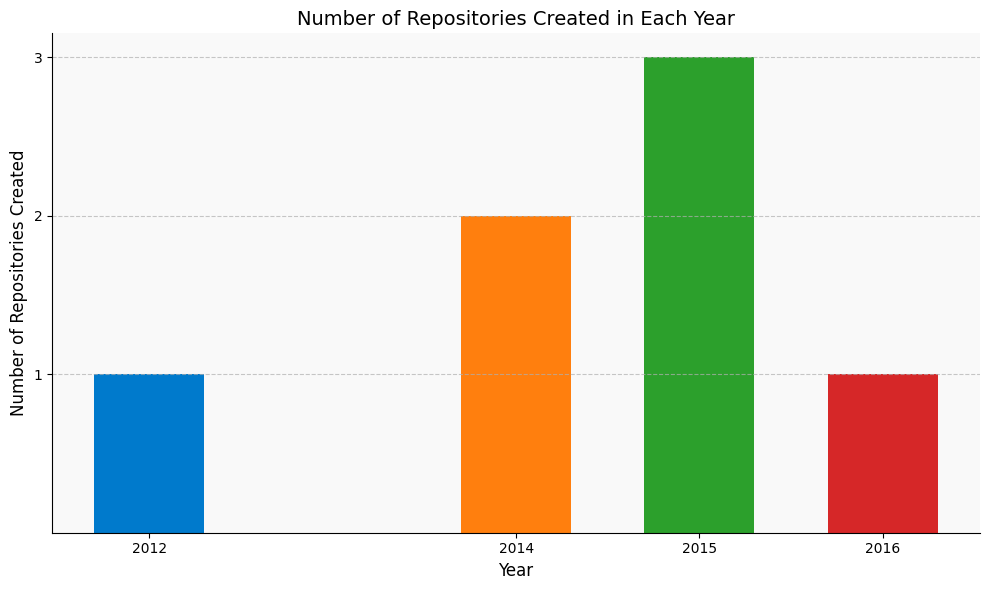

In [94]:
# Step 5: Visualize the data with custom style
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.6
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_per_year.index, repositories_per_year.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Repositories Created", fontsize=12)
plt.title("Number of Repositories Created in Each Year", fontsize=14)

# Custom font for tick labels
plt.xticks(repositories_per_year.index, fontsize=10)
plt.yticks(range(int(repositories_per_year.values.min()), int(repositories_per_year.values.max()) + 1))


# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = 'repository_per_year.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

In [88]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Step 1: Read data from CSV
file_path = "../data/user_location.csv"  # Replace with the actual file path
user_location_df = pd.read_csv(file_path)

# Step 2: Group by country and calculate the count of users from each country
country_counts = user_location_df['Country'].value_counts()

# Step 3: Create a DataFrame with country names and their corresponding counts
df_countries = pd.DataFrame({'Country': country_counts.index, 'User Count': country_counts.values})

# Step 4: Load world shapefile data using geopandas
world = gpd.read_file('../data/ne_110m_admin_0_countries.shp')  # Replace with the correct path to the shapefile

# Step 5: Merge the world shapefile data with the user count data
merged_data = world.merge(df_countries, left_on='ADMIN', right_on='Country', how='left')




<Figure size 2500x1500 with 0 Axes>

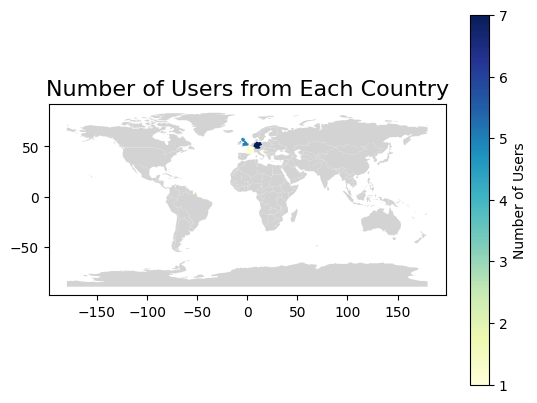

In [89]:
# Step 6: Plot the choropleth map
plt.figure(figsize=(25, 15))  # Adjust the figure size if needed
merged_data.plot(column='User Count', cmap='YlGnBu', legend=True, legend_kwds={'label': 'Number of Users'}, missing_kwds={'color': 'lightgrey'})
plt.title('Number of Users from Each Country', fontsize=16)

# Save the plot as a PNG image
output_path = 'user_map.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=1800, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()


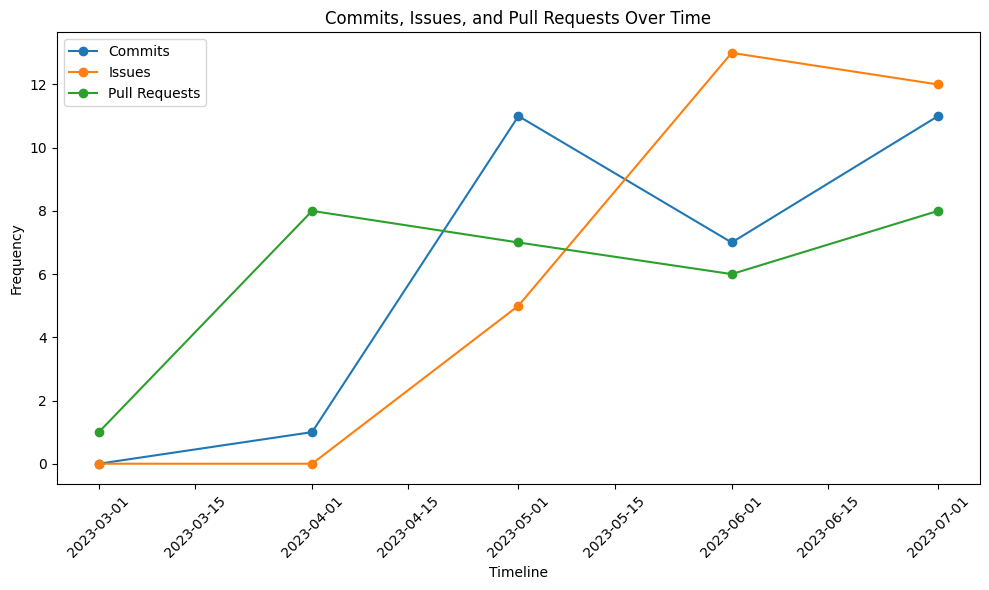

In [90]:
# Step 1: Read data from CSV
repository_activity_file_path = "../data/repository_activity.csv"  # Replace with the actual file path
repository_activity_df = pd.read_csv(repository_activity_file_path)

# Group the DataFrame by month and calculate the sum of commits, issues, and pull requests per month
grouped_repository_activity_df = repository_activity_df.groupby('Month').sum()

# Extract the timeline (months) from the index and convert it to datetime
timeline = pd.to_datetime(grouped_repository_activity_df.index)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timeline, grouped_repository_activity_df['Commits Per Month'], label='Commits', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Issues Per Month'], label='Issues', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Pull Requests Per Month'], label='Pull Requests', marker='o')

# Customize the chart
plt.xlabel('Timeline')
plt.ylabel('Frequency')
plt.title('Commits, Issues, and Pull Requests Over Time')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()

# Save the plot as a PNG image
output_path = 'repository_activity.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

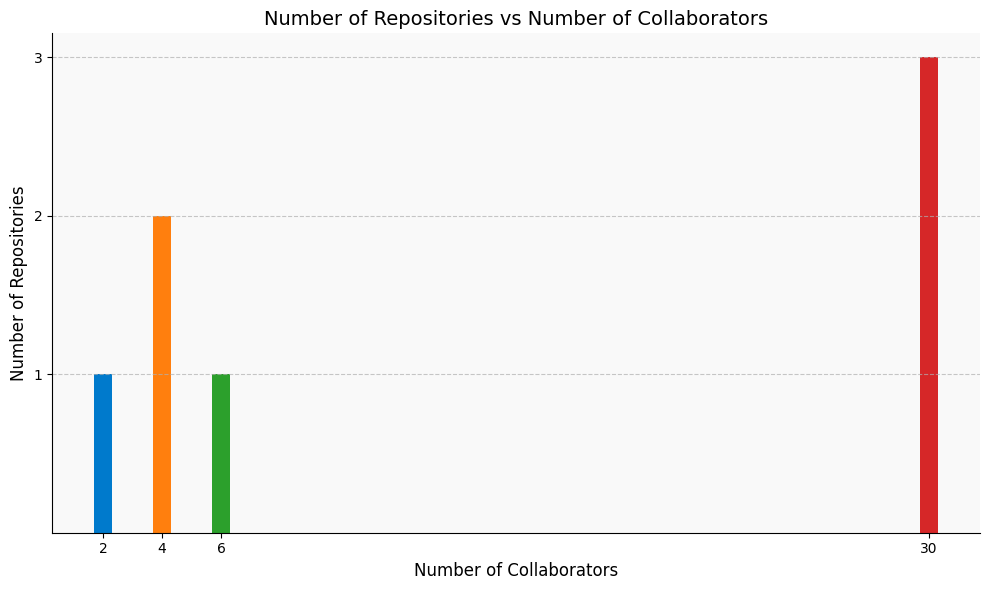

In [93]:
def count_repositories_by_collaborators(repository_details):
    collaborators_count = {}
    for repo_info in repository_details:
        num_contributors = repo_info['Number of Contributors']
        collaborators_count[num_contributors] = collaborators_count.get(num_contributors, 0) + 1
    return collaborators_count

# Calculate the number of repositories for each number of collaborators
#collaborators_count = count_repositories_by_collaborators(repository_details)


# Group by Year and Count
repositories_vs_contributors = repository_df.groupby("Number of Contributors").size()

# Step 5: Visualize the data with custom style
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.6
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_vs_contributors.index, repositories_vs_contributors.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Number of Collaborators", fontsize=12)
plt.ylabel("Number of Repositories", fontsize=12)
plt.title("Number of Repositories vs Number of Collaborators", fontsize=14)

# Custom font for tick labels
plt.xticks(repositories_vs_contributors.index, fontsize=10)
plt.yticks(range(int(repositories_vs_contributors.values.min()), int(repositories_vs_contributors.values.max()) + 1))


# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = 'repository_vs_collaborators.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

In [59]:
df_countries

,Country,User Count
0,Germany,7
1,United Kingdom,5
2,United States,3
3,Croatia,1
4,France,1
5,Slovenia,1


In [34]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [55]:
import pandas as pd
import pycountry

# Sample data with native country names
data = {'Country': ['Deutschland', 'France', 'Italia', 'España']}
df = pd.DataFrame(data)

# Function to convert native country name to English name
def convert_to_english(name):
    try:
        country = pycountry.countries.get(name=name)
        return country.name
    except AttributeError:
        return name

# Apply the conversion function to the 'Country' column
df['English Name'] = df['Country'].apply(convert_to_english)

print(df)


       Country English Name
0  Deutschland  Deutschland
1       France       France
2       Italia       Italia
3       España       España


In [56]:
from geopy.geocoders import Nominatim
import pandas as pd

# Sample data with native country names
data = {'Country': ['Deutschland', 'France', 'Italia', 'España']}
df = pd.DataFrame(data)

# Function to convert native country name to English name
def convert_to_english(name):
    geolocator = Nominatim(user_agent="country_converter")
    location = geolocator.geocode(name, exactly_one=True, language="en")
    if location:
        return location.address.split(",")[-1].strip()
    else:
        return name

# Apply the conversion function to the 'Country' column
df['English Name'] = df['Country'].apply(convert_to_english)

print(df)


       Country English Name
0  Deutschland      Germany
1       France       France
2       Italia        Italy
3       España        Spain
